#**Previsione sottoscrizione deposito**

Nello svolgimento del seguente progetto si tenta di prevedere, mediante l'utilizzo di algoritmi di Machine Learning,
l'adesione ad un conto di deposito offerto dalla banca.
Viene utilizzato un dataset contenente le informazioni relative ad alcuni clienti della banca.

In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dati_new1.csv")

Una prima visualizzazione del dataset di partenza.

In [ ]:
data.head()

age           job   marital  education default  balance housing loan  day  \
0   42  entrepreneur  divorced   tertiary     yes        2     yes   no    5   
1   43    technician    single  secondary      no      593     yes   no    5   
2   57      services   married  secondary      no      162     yes   no    5   
3   45        admin.    single    unknown      no       13     yes   no    5   
4   60       retired   married    primary      no       60     yes   no    5   

  month  duration  campaign  pdays  previous term_deposit  
0   may       380         1     -1         0           no  
1   may        55         1     -1         0           no  
2   may       174         1     -1         0           no  
3   may        98         1     -1         0           no  
4   may       219         1     -1         0           no

Viene visualizzata la variabile di riferimento, ovvero l'avvenuta adesione ad un conto di deposito sottoscritto dalla banca.

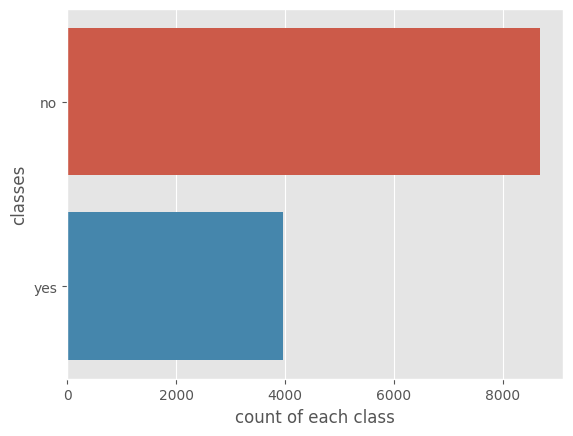

In [ ]:
#some imports to plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=data.term_deposit ,data=data)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [ ]:
data['term_deposit'].value_counts()

no     8678
yes    3961
Name: term_deposit, dtype: int64

In [ ]:
# 54% no 46% si

(data['term_deposit'].value_counts())/len(data)

no     0.686605
yes    0.313395
Name: term_deposit, dtype: float64

Informazioni relative alla tipologia delle variabili, le colonne, il conteggio dei valori nulli e l'utilizzo di memoria.

In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12639 entries, 0 to 12638
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12639 non-null  int64 
 1   job           12639 non-null  object
 2   marital       12639 non-null  object
 3   education     12639 non-null  object
 4   default       12639 non-null  object
 5   balance       12639 non-null  int64 
 6   housing       12639 non-null  object
 7   loan          12639 non-null  object
 8   day           12639 non-null  int64 
 9   month         12639 non-null  object
 10  duration      12639 non-null  int64 
 11  campaign      12639 non-null  int64 
 12  pdays         12639 non-null  int64 
 13  previous      12639 non-null  int64 
 14  term_deposit  12639 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.4+ MB


Statistiche descrittive basilare del dataset.

In [ ]:
data.describe(include="all")

age         job  marital  education default       balance  \
count   12639.000000       12639    12639      12639   12639  12639.000000   
unique           NaN          12        3          4       2           NaN   
top              NaN  management  married  secondary      no           NaN   
freq             NaN        2761     7399       6332   12419           NaN   
mean       40.939077         NaN      NaN        NaN     NaN   1425.023261   
std        10.840946         NaN      NaN        NaN     NaN   3014.382883   
min        18.000000         NaN      NaN        NaN     NaN  -6847.000000   
25%        32.000000         NaN      NaN        NaN     NaN     86.000000   
50%        39.000000         NaN      NaN        NaN     NaN    478.000000   
75%        48.000000         NaN      NaN        NaN     NaN   1516.500000   
max        95.000000         NaN      NaN        NaN     NaN  81204.000000   

       housing   loan           day  month      duration      campaign  \
count    12639  12639  12639.000000  12639  12639.000000  12639.000000   
unique       2      2           NaN     12           NaN           NaN   
top        yes     no           NaN    may           NaN           NaN   
freq      6803  10674           NaN   3702           NaN           NaN   
mean       NaN    NaN     15.715088    NaN    336.726719      2.702745   
std        NaN    NaN      8.323035    NaN    336.118980      2.962794   
min        NaN    NaN      1.000000    NaN      3.000000      1.000000   
25%        NaN    NaN      8.000000    NaN    119.000000      1.000000   
50%        NaN    NaN     16.000000    NaN    219.000000      2.000000   
75%        NaN    NaN     21.000000    NaN    436.000000      3.000000   
max        NaN    NaN     31.000000    NaN   3881.000000     43.000000   

               pdays      previous term_deposit  
count   12639.000000  12639.000000        12639  
unique           NaN           NaN            2  
top              NaN           NaN           no  
freq             NaN           NaN         8678  
mean       35.591502      0.507319          NaN  
std        91.862379      1.785123          NaN  
min        -1.000000      0.000000          NaN  
25%        -1.000000      0.000000          NaN  
50%        -1.000000      0.000000          NaN  
75%        -1.000000      0.000000          NaN  
max       520.000000     58.000000          NaN

In [ ]:
data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
term_deposit    0
dtype: int64

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'term_deposit'],
      dtype='object')

Viene stabilito quali siano le covariate numeriche e quali siano le covariate categoriche.

In [ ]:
data.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
term_deposit    object
dtype: object

Verifica delle modalità delle covariate categoriche.

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper())
        print('=====================================')
        print(data[column].unique() ,"\n\n\n")

JOB
['entrepreneur' 'technician' 'services' 'admin.' 'retired' 'blue-collar'
 'management' 'self-employed' 'unemployed' 'student' 'unknown' 'housemaid'] 



MARITAL
['divorced' 'single' 'married'] 



EDUCATION
['tertiary' 'secondary' 'unknown' 'primary'] 



DEFAULT
['yes' 'no'] 



HOUSING
['yes' 'no'] 



LOAN
['no' 'yes'] 



MONTH
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 



TERM_DEPOSIT
['no' 'yes'] 





Ricerca di tutte le colonne con valori nulli.

In [55]:
def unknown(data_frame):
    columns = data_frame.columns

    presence_list = []
    for i in columns:
        if 'unknown' in data_frame[i].unique():
            presence_list.append(i)
    return presence_list

unknowns = unknown(data)
unknowns

<ipython-input-55-3fead417450f>:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in data_frame[i].unique():


['job', 'education']

In [ ]:
for i in unknowns:
    precentage = len(data[data[i] == 'unknown']) /len(data[i]) * 100
    print(i.upper() , f'\n=========================================\n{str(precentage)}' + '%' '\n\n\n' )

JOB 
0.6171374317588417%



EDUCATION 
3.766120737400111%





Creazione delle funzioni per osservare la distribuzione delle "features".

In [ ]:
# creazione di una funzione per visualizzare la distribuzione di tutte le features
def plot_distributions(df):
    plt.figure(figsize=(28,40))
    b = 0
    for i in df.columns:
        b+=1
        plt.subplot(6,6,b)
        plt.hist(df[i])
        plt.title(i)

# creazione di una funzione per visualizzare la distribuzione di una sola feature
def plot_idividual( column_name,df= data):
    plt.figure(figsize=(15,10))
    plt.hist(df[column_name])
    plt.title(column_name)

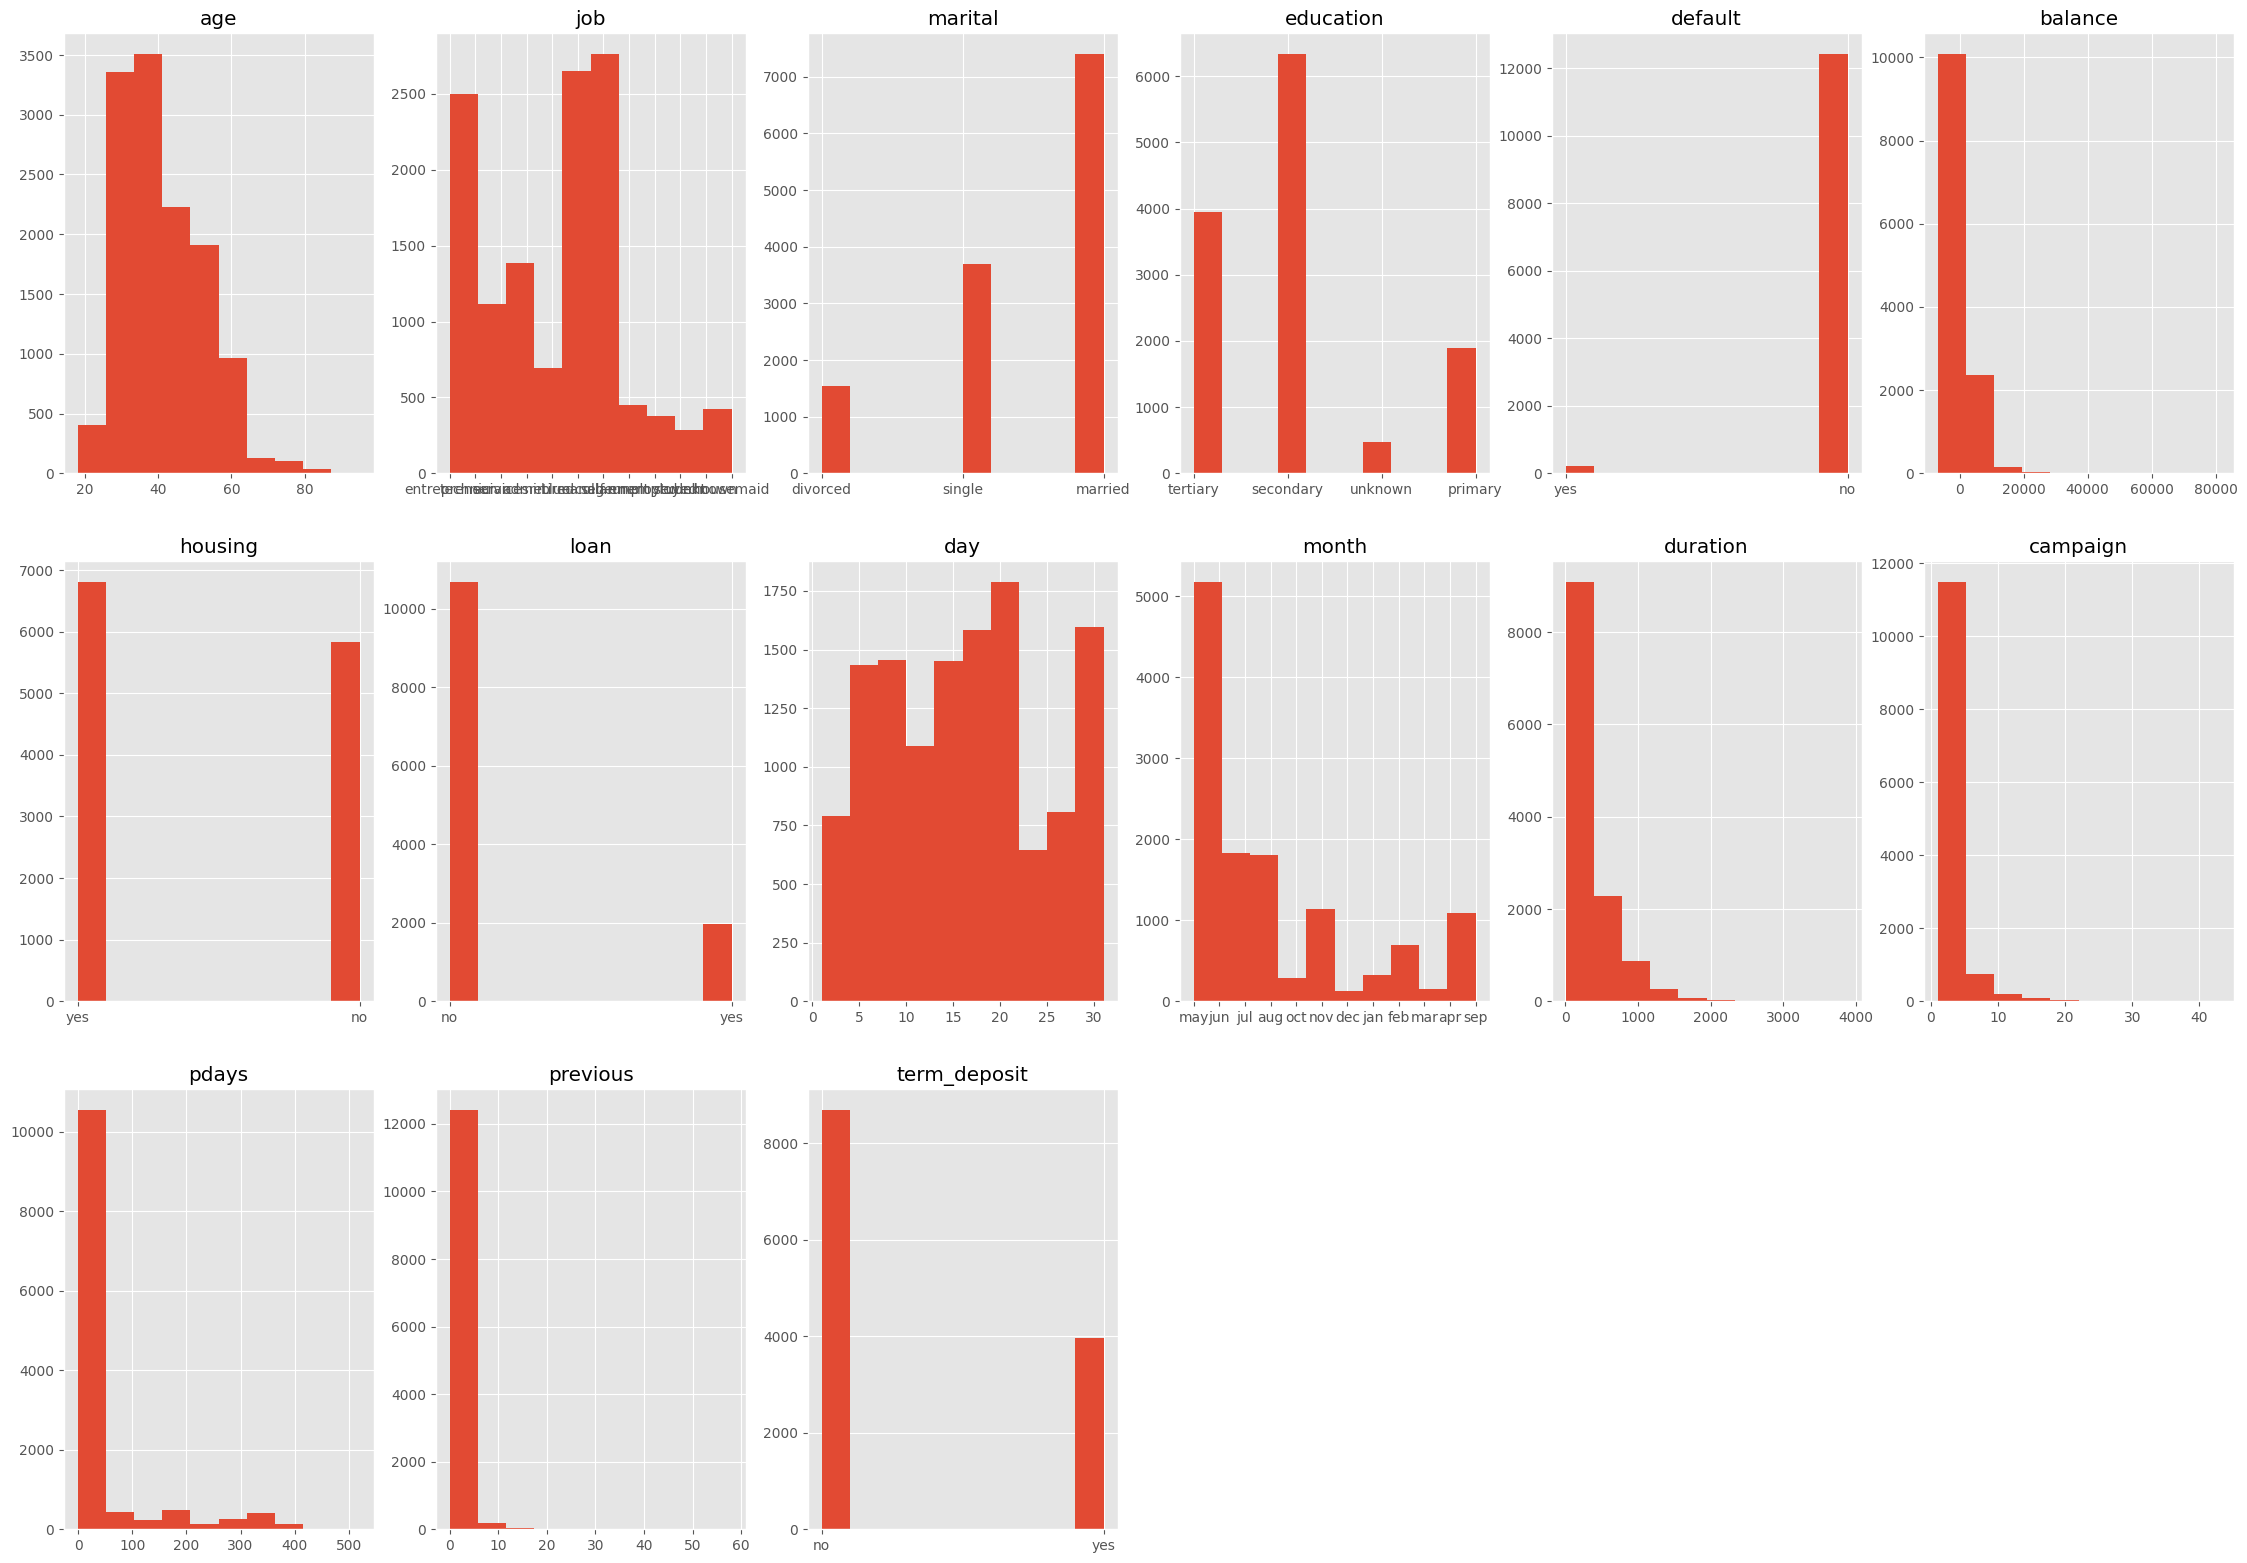

In [ ]:
# Grafico di distribuzione delle features
plot_distributions(data)

In [ ]:
df_categorical=data.select_dtypes(include=['object'])
df_categorical.head()

job   marital  education default housing loan month term_deposit
0  entrepreneur  divorced   tertiary     yes     yes   no   may           no
1    technician    single  secondary      no     yes   no   may           no
2      services   married  secondary      no     yes   no   may           no
3        admin.    single    unknown      no     yes   no   may           no
4       retired   married    primary      no     yes   no   may           no

In [ ]:
df_numerical=data.select_dtypes(include=['int','float'])
df_numerical.head()

age  balance  day  duration  campaign  pdays  previous
0   42        2    5       380         1     -1         0
1   43      593    5        55         1     -1         0
2   57      162    5       174         1     -1         0
3   45       13    5        98         1     -1         0
4   60       60    5       219         1     -1         0

# Variabili categoriche

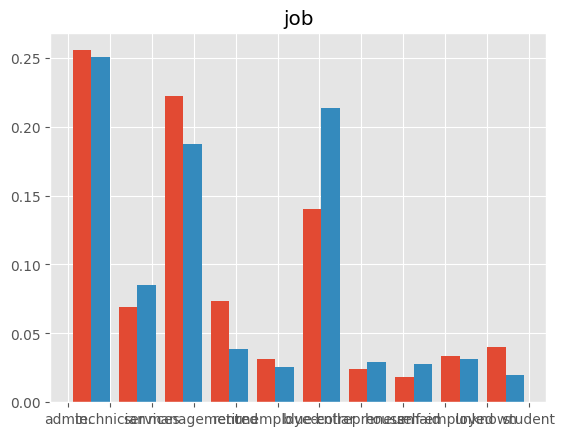

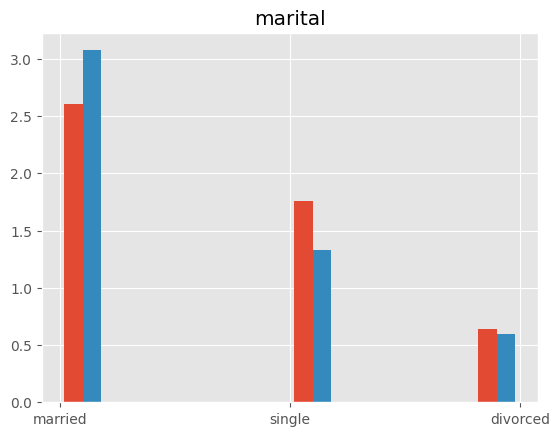

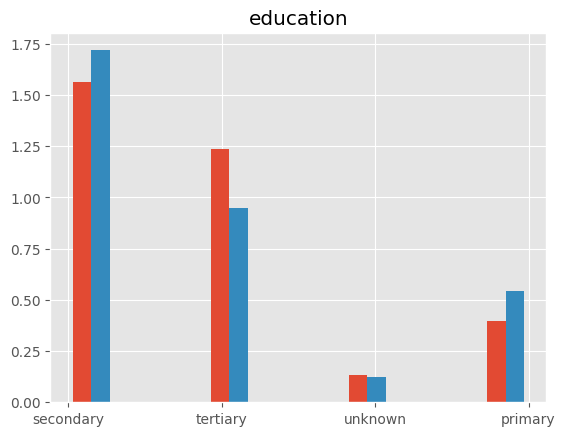

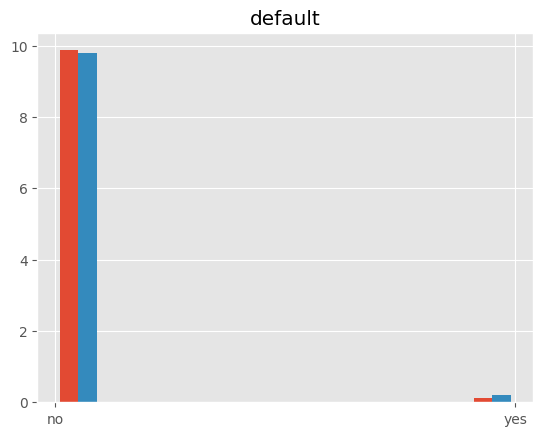

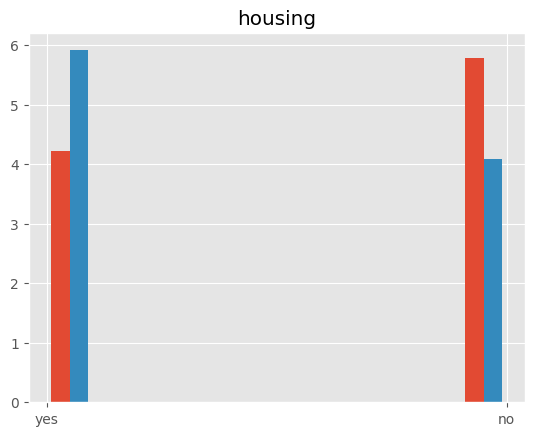

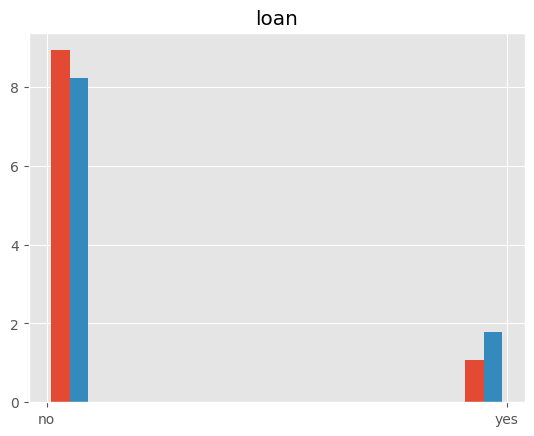

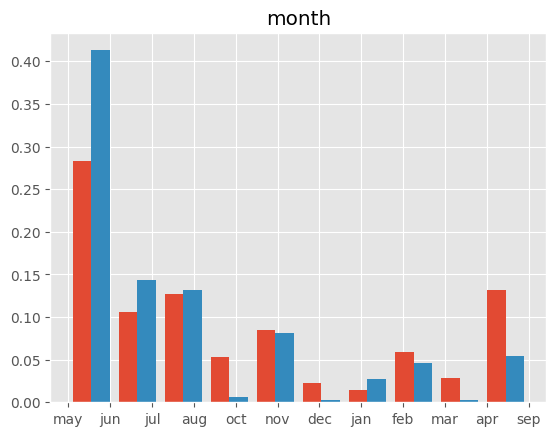

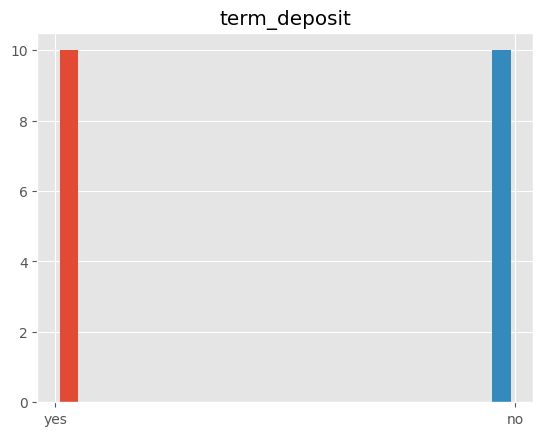

In [ ]:
df_0=df_categorical[data['term_deposit']=='no'] # records con target==no
df_1=df_categorical[data['term_deposit']=='yes'] # records con target==yes
for x in df_categorical.columns :
    plt.figure()
    plt.hist([df_1[x],df_0[x]],density=True )
    plt.title(x)
    plt.show()

In [ ]:
df_categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'term_deposit'],
      dtype='object')

Trasformazione delle variabili categoriche in dummies.

In [ ]:
dummies = pd.get_dummies(df_categorical[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'term_deposit']],drop_first=True)

dummies.tail()

job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
12634                0                 0              0               0   
12635                0                 0              0               1   
12636                0                 0              0               0   
12637                0                 0              0               0   
12638                0                 0              0               0   

       job_retired  job_self-employed  job_services  job_student  \
12634            0                  1             0            0   
12635            0                  0             0            0   
12636            0                  0             0            1   
12637            1                  0             0            0   
12638            0                  0             0            1   

       job_technician  job_unemployed  ...  month_feb  month_jan  month_jul  \
12634               0               0  ...          0          1          0   
12635               0               0  ...          0          1          0   
12636               0               0  ...          0          1          0   
12637               0               0  ...          0          1          0   
12638               0               0  ...          0          1          0   

       month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
12634          0          0          0          0          0          0   
12635          0          0          0          0          0          0   
12636          0          0          0          0          0          0   
12637          0          0          0          0          0          0   
12638          0          0          0          0          0          0   

       term_deposit_yes  
12634                 1  
12635                 1  
12636                 1  
12637                 1  
12638                 1  

[5 rows x 31 columns]

In [ ]:
dummies.columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'term_deposit_yes'],
      dtype='object')

# Variabili Numeriche

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

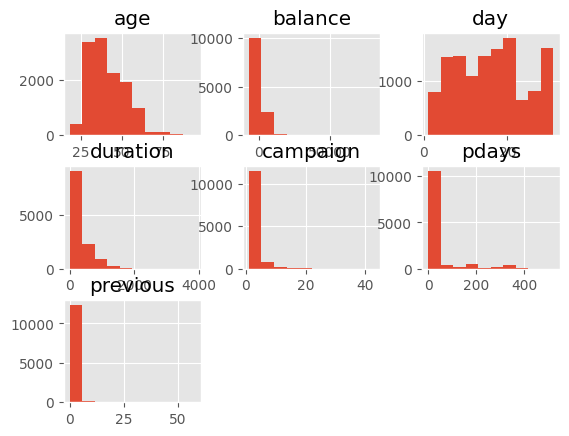

In [ ]:
df_numerical.hist()

In [ ]:
df_numerical.previous

0        0
1        0
2        0
3        0
4        0
        ..
12634    0
12635    2
12636    1
12637    0
12638    0
Name: previous, Length: 12639, dtype: int64

Trasformazione funzionale delle covariate numeriche.

In [ ]:
import math
#trasformazione delle covariate

df_numerical['target']=dummies['term_deposit_yes']
df_numerical['logcampaign']=df_numerical['campaign'].apply(math.log)
df_numerical['logduration']=df_numerical['duration'].apply(lambda x: math.log(x+1))
df_numerical['logprevious']=df_numerical['previous'].apply(lambda x: math.log(x+1))

In [ ]:
df_numerical.tail()

age  balance  day  duration  campaign  pdays  previous  target  \
12634   28     4579   12       409         2     -1         0       1   
12635   49     1093   12       243         2     91         2       1   
12636   21     2488   12       661         2     92         1       1   
12637   87     2190   12       512         2     -1         0       1   
12638   22      254   13       143         2     -1         0       1   

       logcampaign  logduration  logprevious  
12634     0.693147     6.016157     0.000000  
12635     0.693147     5.497168     1.098612  
12636     0.693147     6.495266     0.693147  
12637     0.693147     6.240276     0.000000  
12638     0.693147     4.969813     0.000000

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'logcampaign'}>],
       [<Axes: title={'center': 'logduration'}>,
        <Axes: title={'center': 'logprevious'}>, <Axes: >]], dtype=object)

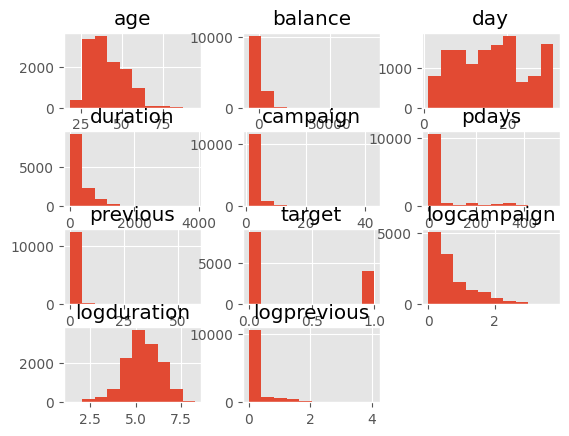

In [ ]:
df_numerical.hist()

Grafico che mette in relazione le variabili numeriche con riferimento alla variabile target, ovvero l'adesione o meno al conto di deposito (rispettivamente in rosso e in blu).

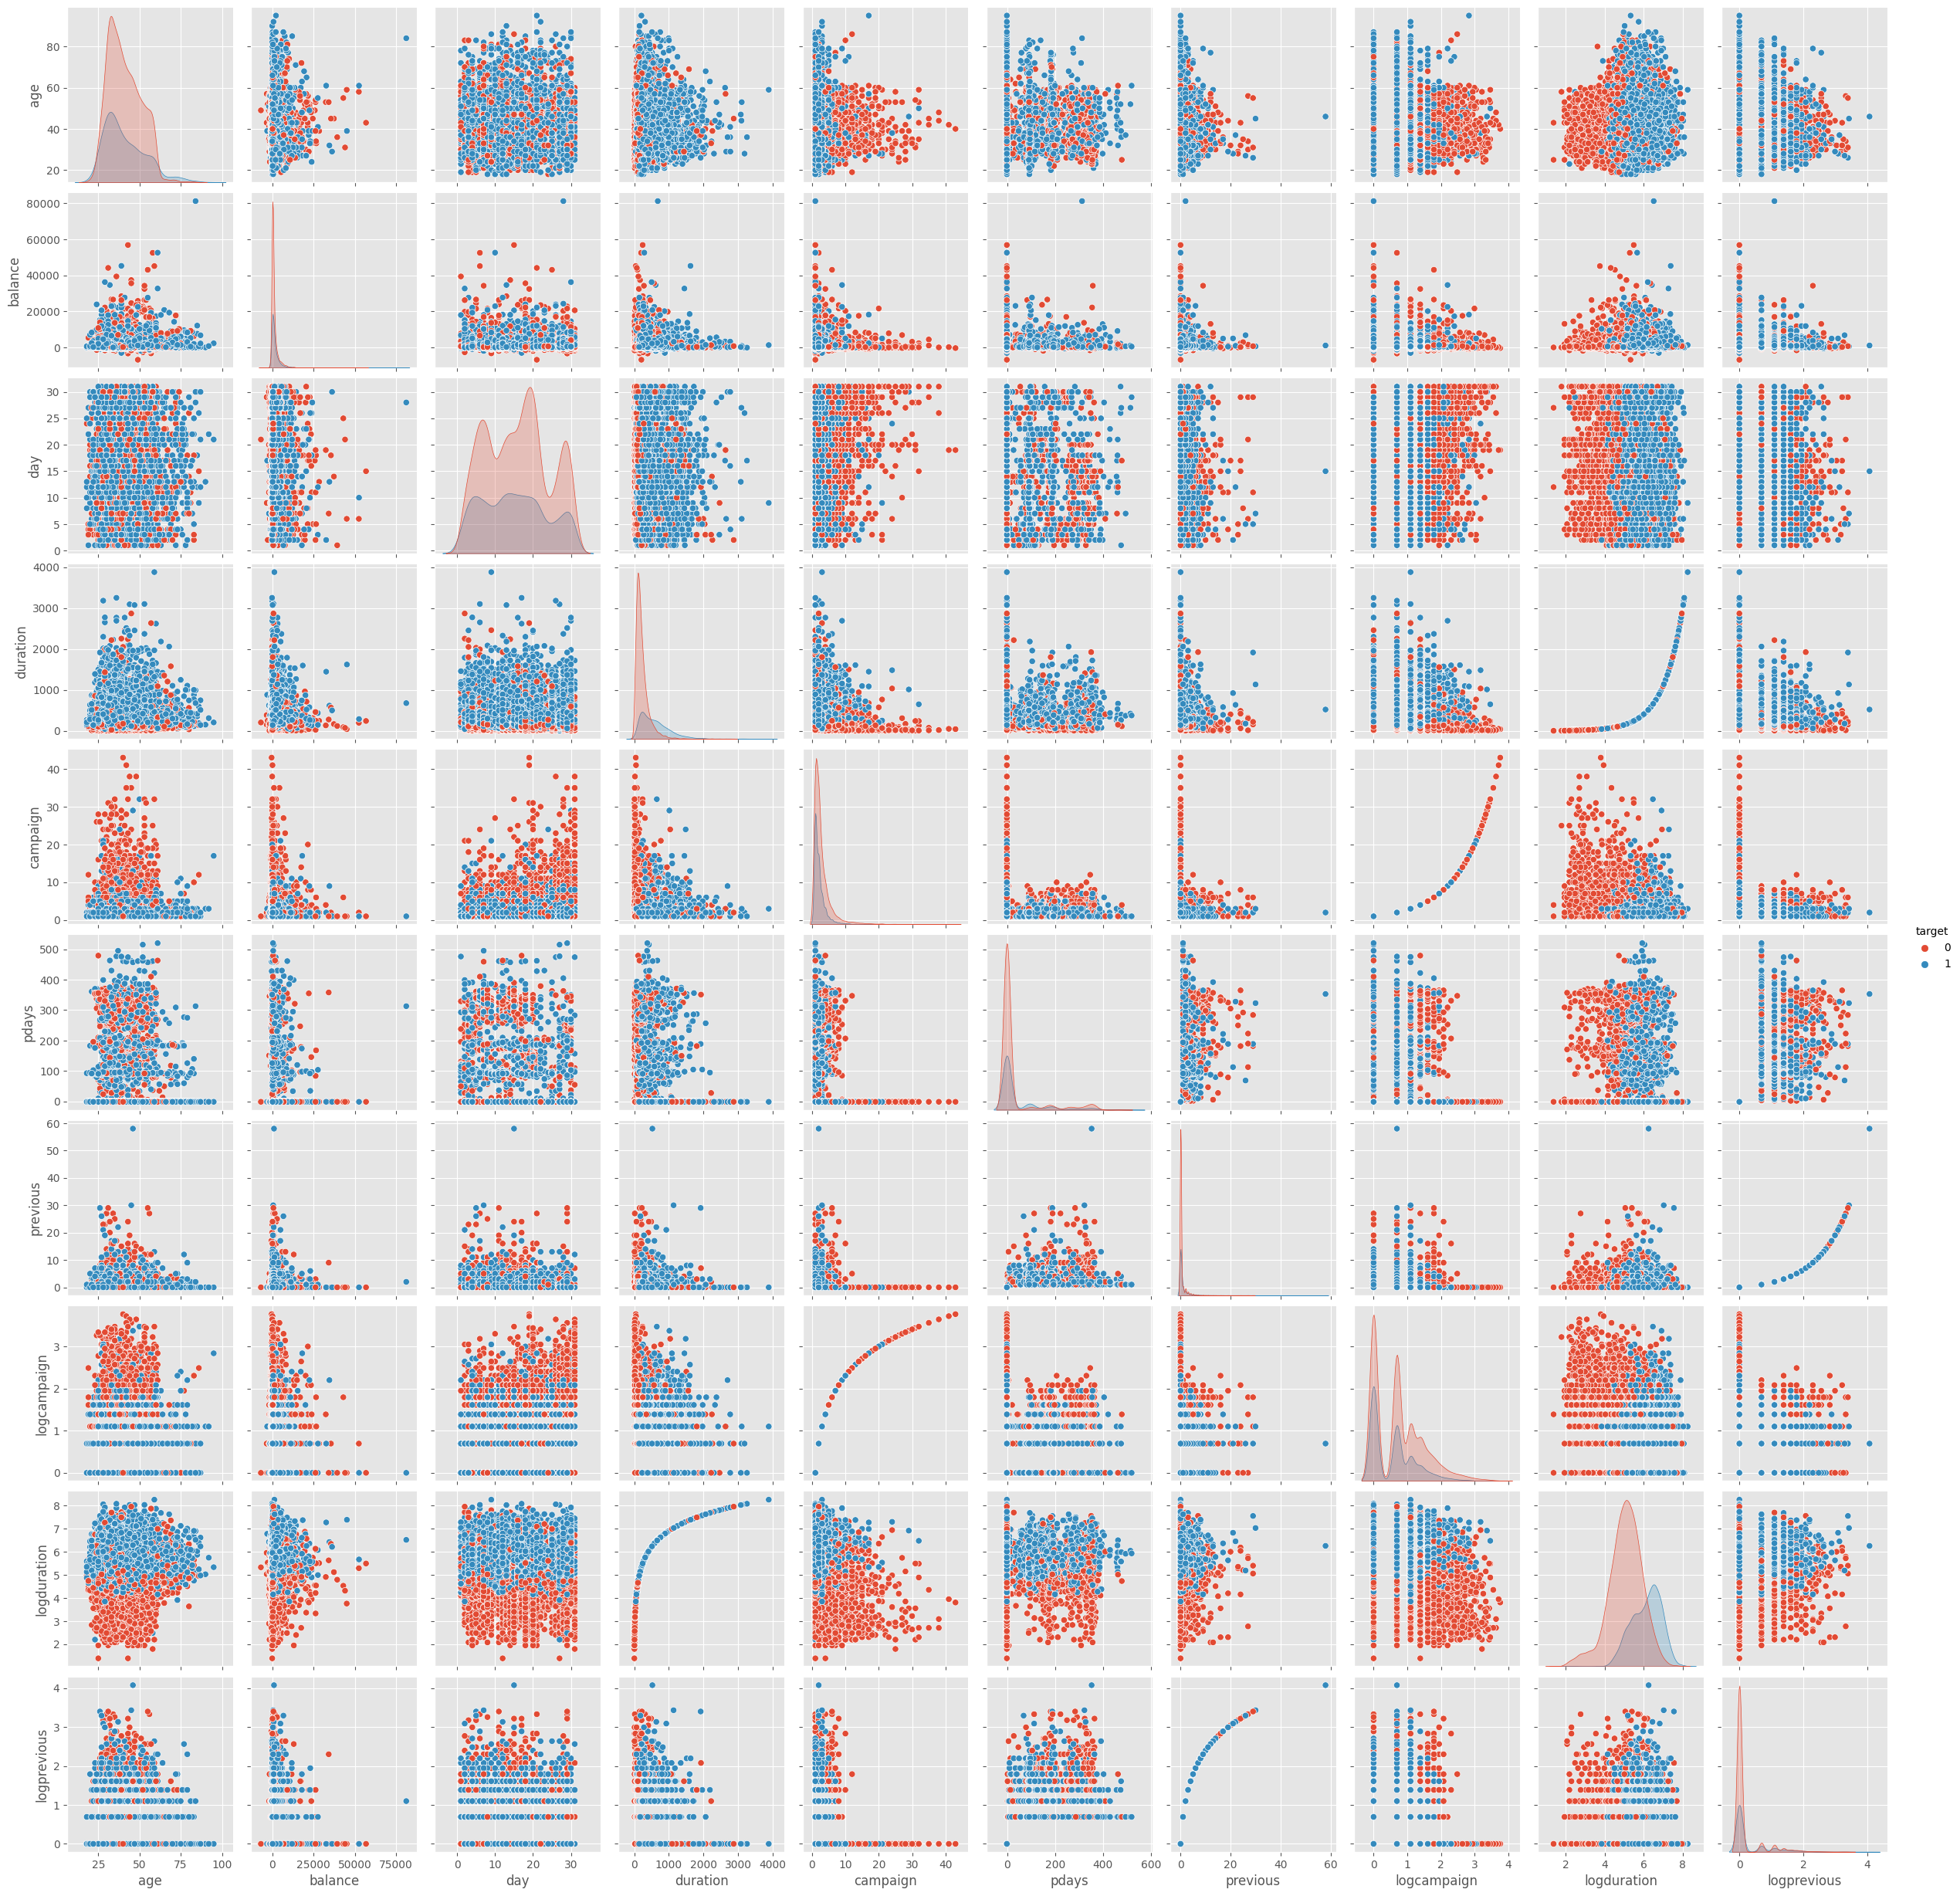

In [ ]:
sns.pairplot(df_numerical[['age',	'balance',	'day',	'duration',	'campaign',	'pdays',	'previous',	'logcampaign',	'logduration',	'logprevious', 'target']], hue='target')

Trasformazione in dati scalati.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.tail()

age   balance       day  duration  campaign     pdays  previous  \
12634 -1.193585  1.046351 -0.446380  0.215031   -0.2372 -0.398345 -0.284204   
12635  0.743592 -0.110151 -0.446380 -0.278861   -0.2372  0.603192  0.836211   
12636 -1.839310  0.352649 -0.446380  0.964796   -0.2372  0.614079  0.276004   
12637  4.248960  0.253786 -0.446380  0.521483   -0.2372 -0.398345 -0.284204   
12638 -1.747064 -0.388494 -0.326227 -0.576386   -0.2372 -0.398345 -0.284204   

         target  logcampaign  logduration  logprevious  
12634  1.480156     0.003036     0.639552    -0.409425  
12635  1.480156     0.003036     0.106618     1.777717  
12636  1.480156     0.003036     1.131533     0.970508  
12637  1.480156     0.003036     0.869692    -0.409425  
12638  1.480156     0.003036    -0.434906    -0.409425

<Axes: >

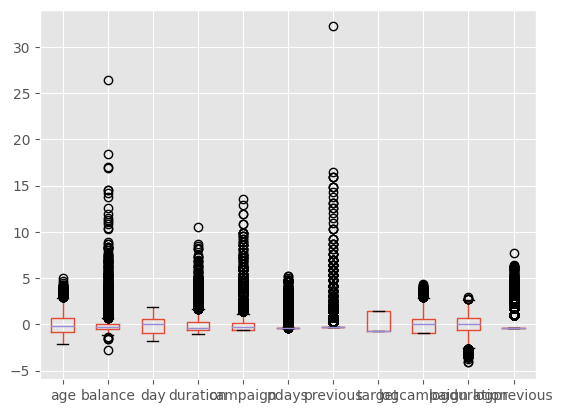

In [ ]:
scaled_df.boxplot()

In [ ]:
scaled_df.tail()

age   balance       day  duration  campaign     pdays  previous  \
12634 -1.193585  1.046351 -0.446380  0.215031   -0.2372 -0.398345 -0.284204   
12635  0.743592 -0.110151 -0.446380 -0.278861   -0.2372  0.603192  0.836211   
12636 -1.839310  0.352649 -0.446380  0.964796   -0.2372  0.614079  0.276004   
12637  4.248960  0.253786 -0.446380  0.521483   -0.2372 -0.398345 -0.284204   
12638 -1.747064 -0.388494 -0.326227 -0.576386   -0.2372 -0.398345 -0.284204   

         target  logcampaign  logduration  logprevious  
12634  1.480156     0.003036     0.639552    -0.409425  
12635  1.480156     0.003036     0.106618     1.777717  
12636  1.480156     0.003036     1.131533     0.970508  
12637  1.480156     0.003036     0.869692    -0.409425  
12638  1.480156     0.003036    -0.434906    -0.409425

In [ ]:
X_numerical=scaled_df[['age',	'balance',	'day',	'duration',	'campaign',	'pdays',	'previous',	'logcampaign',	'logduration',	'logprevious']]

In [ ]:
X_dummies= dummies.drop('term_deposit_yes', axis=1)

In [ ]:
print(X_dummies.shape)
print(X_numerical.shape)

X_dummies.head()

(12639, 30)
(12639, 10)


job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 1              0               0   
1                0                 0              0               0   
2                0                 0              0               0   
3                0                 0              0               0   
4                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             0            0               1   
2            0                  0             1            0               0   
3            0                  0             0            0               0   
4            1                  0             0            0               0   

   job_unemployed  ...  month_dec  month_feb  month_jan  month_jul  month_jun  \
0               0  ...          0          0          0          0          0   
1               0  ...          0          0          0          0          0   
2               0  ...          0          0          0          0          0   
3               0  ...          0          0          0          0          0   
4               0  ...          0          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  
0          0          1          0          0          0  
1          0          1          0          0          0  
2          0          1          0          0          0  
3          0          1          0          0          0  
4          0          1          0          0          0  

[5 rows x 30 columns]

In [ ]:
X=pd.concat([X_dummies,X_numerical], axis = 1)

print(X.shape)

X.tail()

(12639, 40)


job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
12634                0                 0              0               0   
12635                0                 0              0               1   
12636                0                 0              0               0   
12637                0                 0              0               0   
12638                0                 0              0               0   

       job_retired  job_self-employed  job_services  job_student  \
12634            0                  1             0            0   
12635            0                  0             0            0   
12636            0                  0             0            1   
12637            1                  0             0            0   
12638            0                  0             0            1   

       job_technician  job_unemployed  ...       age   balance       day  \
12634               0               0  ... -1.193585  1.046351 -0.446380   
12635               0               0  ...  0.743592 -0.110151 -0.446380   
12636               0               0  ... -1.839310  0.352649 -0.446380   
12637               0               0  ...  4.248960  0.253786 -0.446380   
12638               0               0  ... -1.747064 -0.388494 -0.326227   

       duration  campaign     pdays  previous  logcampaign  logduration  \
12634  0.215031   -0.2372 -0.398345 -0.284204     0.003036     0.639552   
12635 -0.278861   -0.2372  0.603192  0.836211     0.003036     0.106618   
12636  0.964796   -0.2372  0.614079  0.276004     0.003036     1.131533   
12637  0.521483   -0.2372 -0.398345 -0.284204     0.003036     0.869692   
12638 -0.576386   -0.2372 -0.398345 -0.284204     0.003036    -0.434906   

       logprevious  
12634    -0.409425  
12635     1.777717  
12636     0.970508  
12637    -0.409425  
12638    -0.409425  

[5 rows x 40 columns]

# Separazione training set e test set

In [ ]:
y=df_numerical['target']
y.shape

(12639,)

In [ ]:
from sklearn.model_selection import train_test_split

#SEPARAZIONE DEI DATI IN TRAIN SET E TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.30, #by default is 75%-25%
                                                    stratify=y, #preservo la proporzione dei dati
                                                    random_state= 123) #fisso un seed per replicare

print(X_train.shape, X_test.shape)

(8847, 40) (3792, 40)


# Modelli


Importo i modelli che utilizzerò per lo sviluppo dell'algoritmo.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,100,1000)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

hyperp_search(classifier,parameters)

f1_train: 0.643011 using {'n_neighbors': 10}
f1_test:  0.6857697911607576
[[2439  165]
 [ 482  706]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2604
           1       0.81      0.59      0.69      1188

    accuracy                           0.83      3792
   macro avg       0.82      0.77      0.78      3792
weighted avg       0.83      0.83      0.82      3792



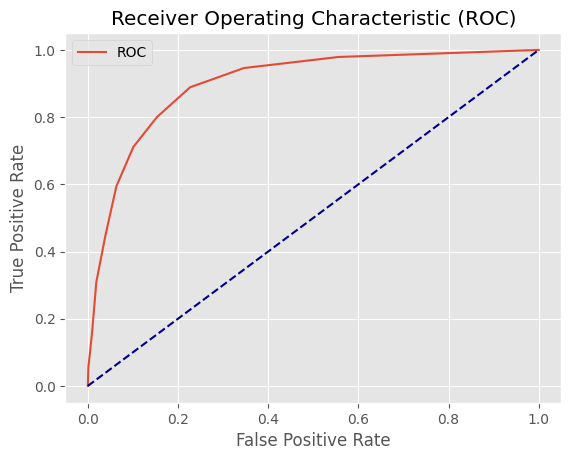

AUC: 0.90


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=10)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba restituisce le probabilità per il target (0 e 1 in questo caso)

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

In [ ]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'],
              'max_depth': [4,5,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]}

hyperp_search(classifier,parameters)

f1_train: 0.704422 using {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}
f1_test:  0.70873786407767
[[2329  275]
 [ 385  803]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2604
           1       0.74      0.68      0.71      1188

    accuracy                           0.83      3792
   macro avg       0.80      0.79      0.79      3792
weighted avg       0.82      0.83      0.82      3792



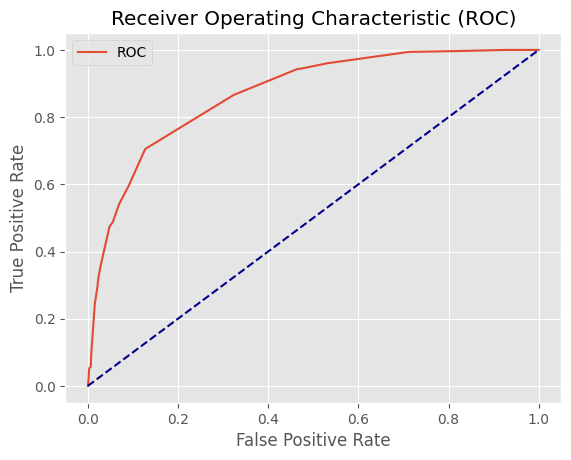

AUC: 0.87


In [ ]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.5586061246040126
f1_test:  0.5586061246040126
[[2427  177]
 [ 659  529]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      2604
           1       0.75      0.45      0.56      1188

    accuracy                           0.78      3792
   macro avg       0.77      0.69      0.71      3792
weighted avg       0.77      0.78      0.76      3792



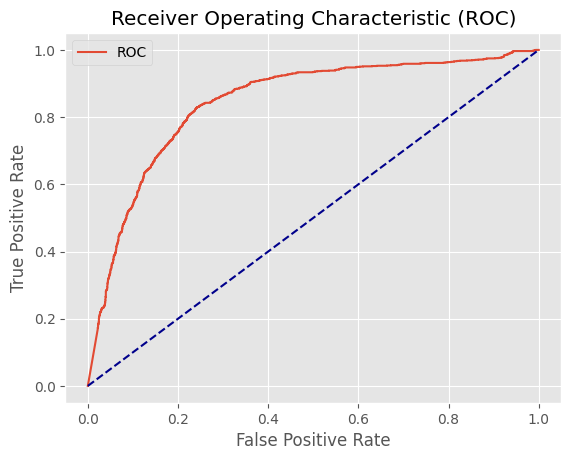

AUC: 0.84


In [ ]:
y_probs = model.predict_proba(X_test) #predict_proba restituisce le probabilità per il target (0 e 1 in questo caso)

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)

In [ ]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000] }


hyperp_search(classifier,parameters)


f1_train: 0.702697 using {'C': 1, 'max_iter': 1000}
f1_test:  0.7315998237108859
[[2353  251]
 [ 358  830]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2604
           1       0.77      0.70      0.73      1188

    accuracy                           0.84      3792
   macro avg       0.82      0.80      0.81      3792
weighted avg       0.84      0.84      0.84      3792



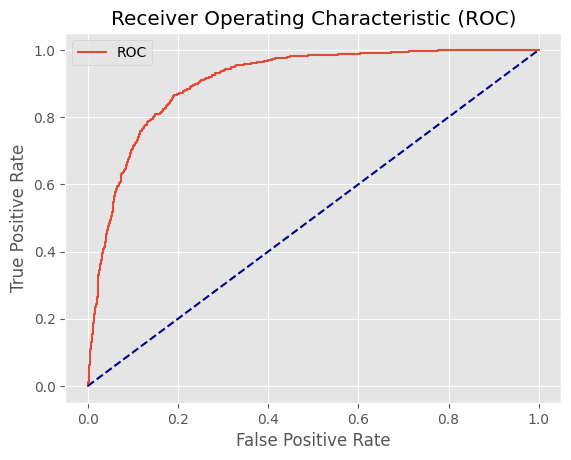

AUC: 0.91


In [ ]:
model = LogisticRegression(C=10, max_iter=2000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)

In [ ]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}

hyperp_search(classifier,parameters)

f1_train: 0.753122 using {'alpha': 0.1, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000}
f1_test:  0.7745713090757005
[[2327  277]
 [ 262  926]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2604
           1       0.77      0.78      0.77      1188

    accuracy                           0.86      3792
   macro avg       0.83      0.84      0.84      3792
weighted avg       0.86      0.86      0.86      3792



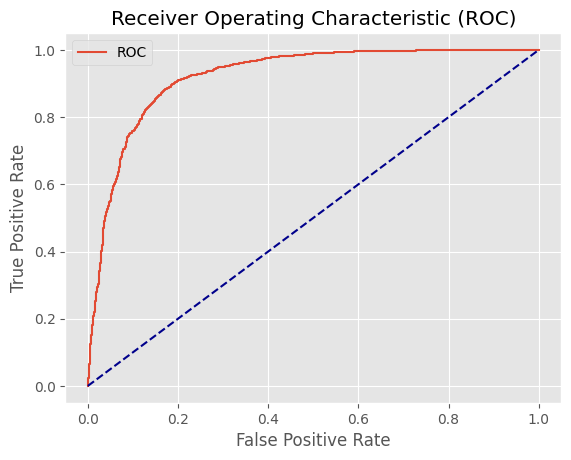

AUC: 0.92


In [ ]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)


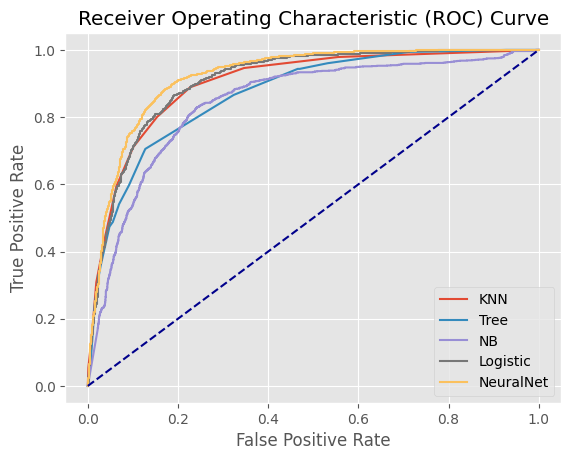

In [ ]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()